In [3]:
# import the libraries
!pip install pandas_datareader pandas --upgrade
import yfinance as yf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [4]:
# Read the Excel file into a DataFrame
df = pd.read_excel("/content/ahluwaliaepspe.xlsx")

FileNotFoundError: ignored

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('EPS')
plt.plot(df['EPS'])
plt.xlabel('Slot Date', fontsize=18)
plt.ylabel('EPS Rs (₹)', fontsize=18)
plt.show()


In [ ]:
# create a new data frame with only the close column
data = df.filter(['EPS'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len
# Scale the data (preprocessing, normalizing/scaling the data)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()
x_train, y_train =np.array(x_train), np.array(y_train)
# Reshape the data,because LSTM requires inputs to be in 3-dim(no.of samples,no.of time stamps, no.of features) and right now our data is in 2-dim
 #x_train.shape # we will only get 2-dim (rows,columns)
# now convert the array to 3-dim
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1)) #no. of rows, no.columns, closing price
x_train.shape
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=2)


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 2047 to 2507
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # all the values that we want our model to predict, actual test values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  # these values are not scaled, they are the original data
# Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data (from 2-dim to 3-dim)
x_test =np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1)) #No.of rows,no.of columns,no.of features
# get the model's predicted price values (we want predicitions based on the x_test dataset)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # we want predictions to contain the same values as our y_test data set contains
# we are unscaling the values
# get the root mean squared error (RMSE) lower value indicates a better fit
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('EPS INR', fontsize=18)
plt.plot(train['EPS'])
plt.plot(valid[['EPS', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
valid['Error Godrej'] = ((valid['Predictions'] - valid['EPS']) / valid['EPS']) * 100
valid
average = valid['Error Godrej'].mean()

# Print the average
print("Average:", average)



[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-01   718.311096   725.666687   718.066650   722.177795   606.568298   
2013-01-02   728.622192   735.555542   725.133362   733.133362   615.770020   
2013-01-03   735.555542   738.355530   724.444458   727.488892   611.029114   
2013-01-04   724.888916   727.066650   719.511108   723.555542   607.725464   
2013-01-07   725.422241   725.777771   704.444458   705.844421   592.849487   
...                 ...          ...          ...          ...          ...   
2023-09-14  2924.899902  2931.649902  2906.000000  2918.600098  2918.600098   
2023-09-15  2933.000000  2934.949951  2900.000000  2908.550049  2908.550049   
2023-09-18  2910.000000  2930.000000  2907.000000  2919.850098  2919.850098   
2023-09-20  2926.949951  2944.949951  2886.050049  2890.000000

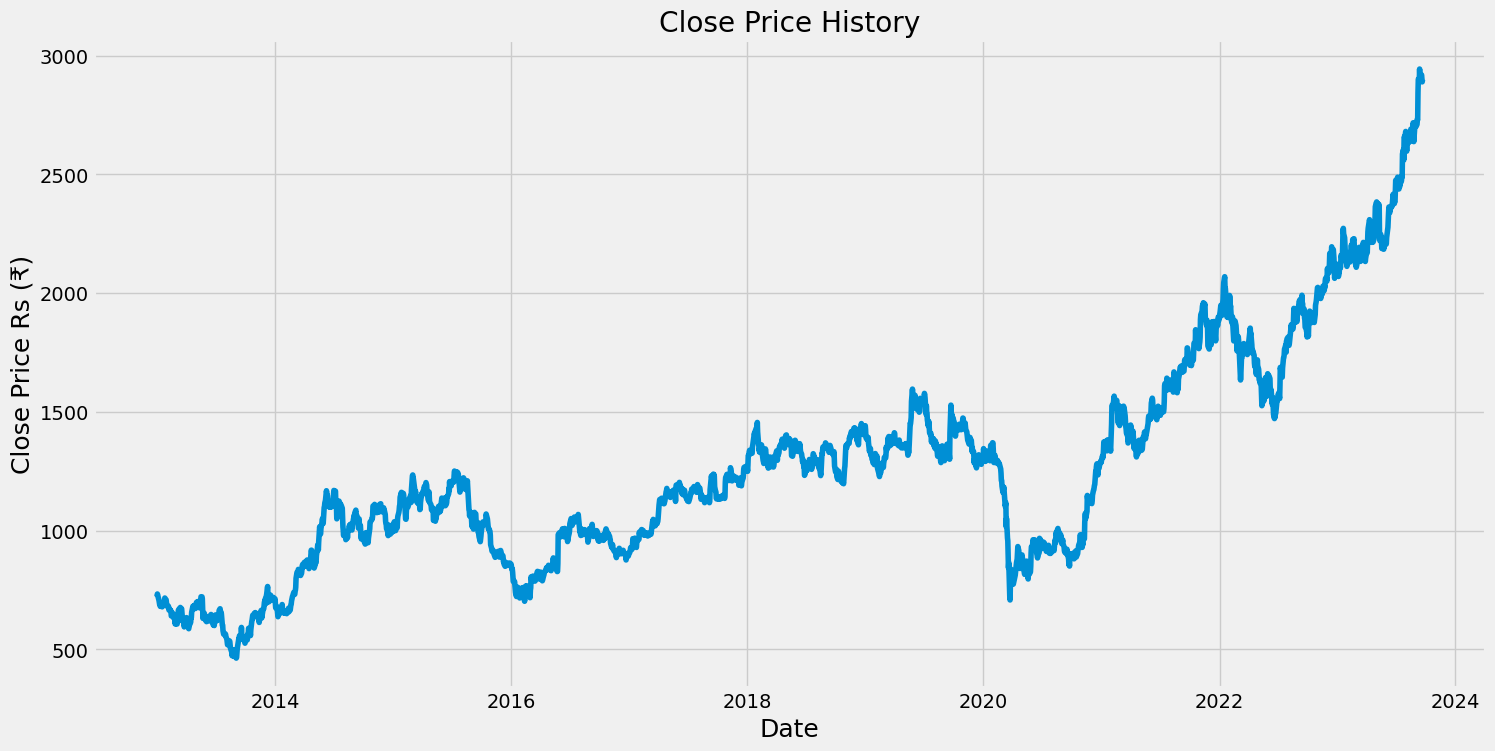

In [25]:
stock_symbol = 'LT.NS'

# Define the date range
start_date = '2013-01-01'
end_date = '2023-09-22'

# Fetch the stock data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the data
print(df)
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title ('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs (₹)', fontsize=18)
plt.show()



In [26]:
# create a new data frame with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len
# Scale the data (preprocessing, normalizing/scaling the data)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()
#convert the x_train and y_train to numpy array, so that we can now use them to train the model
x_train, y_train =np.array(x_train), np.array(y_train)
# Reshape the data,because LSTM requires inputs to be in 3-dim(no.of samples,no.of time stamps, no.of features) and right now our data is in 2-dim
 #x_train.shape # we will only get 2-dim (rows,columns)
# now convert the array to 3-dim
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1)) #no. of rows, no.columns, closing price
x_train.shape
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=2)



[array([0.10448491, 0.1089004 , 0.10662547, 0.10504019, 0.09790196,
       0.09409553, 0.09101453, 0.09045923, 0.08783501, 0.09192808,
       0.09285954, 0.09002933, 0.08707374, 0.08877545, 0.09417612,
       0.09167731, 0.09305658, 0.09733773, 0.10204878, 0.09948725,
       0.09905735, 0.09353127, 0.08960838, 0.0880858 , 0.08837241,
       0.08824703, 0.08444057, 0.08146705, 0.08410021, 0.08029378,
       0.08121628, 0.07889658, 0.07156132, 0.07208079, 0.07655   ,
       0.0754663 , 0.07444528, 0.06882963, 0.07052239, 0.06453057,
       0.05805513, 0.06592777, 0.05843131, 0.06427981, 0.05788495,
       0.06341103, 0.06998499, 0.0756275 , 0.08167304, 0.08393901,
       0.0822373 , 0.08129689, 0.08606167, 0.08357179, 0.08396588,
       0.07685452, 0.07066568, 0.06319608, 0.06404692, 0.05818947])]
[0.05299479392321105]

Epoch 1/2
2058/2058 [==============================] - 35s 16ms/step - loss: 6.0742e-04
Epoch 2/2
2058/2058 [==============================] - 32s 16ms/step - loss: 2.268

In [27]:
#create the testing data set
#create a new array containing scaled values from index 2047 to 2507
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # all the values that we want our model to predict, actual test values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  # these values are not scaled, they are the original data
# Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data (from 2-dim to 3-dim)
x_test =np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1)) #No.of rows,no.of columns,no.of features
# get the model's predicted price values (we want predicitions based on the x_test dataset)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # we want predictions to contain the same values as our y_test data set contains
# we are unscaling the values
# get the root mean squared error (RMSE) lower value indicates a better fit
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


17/17 [==============================] - 1s 8ms/step


32.173216967856476

In [28]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('EPS INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


<ipython-input-28-e066e84d13c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [29]:
valid['Error Godrej'] = ((valid['Predictions'] - valid['Close']) / valid['Close']) * 100
valid

<ipython-input-29-05976a732f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Error Godrej'] = ((valid['Predictions'] - valid['Close']) / valid['Close']) * 100


Close  Predictions  Error Godrej
Date                                              
2021-08-05  1627.400024  1627.076416     -0.019885
2021-08-06  1610.349976  1629.585815      1.194513
2021-08-09  1597.449951  1620.719238      1.456652
2021-08-10  1588.449951  1606.263306      1.121430
2021-08-11  1583.300049  1592.382324      0.573629
...                 ...          ...           ...
2023-09-14  2918.600098  2942.621826      0.823057
2023-09-15  2908.550049  2928.616943      0.689928
2023-09-18  2919.850098  2914.803467     -0.172839
2023-09-20  2890.000000  2917.250000      0.942907
2023-09-21  2899.350098  2902.630615      0.113147

[529 rows x 3 columns]

In [30]:
import datetime

# Calculate the date for tomorrow
today = datetime.date.today()
tomorrow = today - datetime.timedelta(days=1)
tomorrow_str = tomorrow.strftime('%Y-%m-%d')

# Fetch the data for the next day
next_day_data = yf.download(stock_symbol, start=tomorrow_str, end=tomorrow_str)

# Extend your dataset by one day with the data for tomorrow
extended_data = pd.concat([df, next_day_data])

# Scale the extended data
extended_scaled_data = scaler.transform(extended_data[['Close']])

# Create an input sequence for the next day prediction
last_60_days = extended_scaled_data[-60:]
x_input = np.reshape(last_60_days, (1, 60, 1))

# Use the model to predict the closing price for tomorrow
predicted_closing_price = model.predict(x_input)

# Inverse transform the predicted value to get the actual closing price
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Print the predicted closing price for tomorrow
print("Predicted Closing Price for Tomorrow:", predicted_closing_price[0][0])


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 19ms/step
Predicted Closing Price for Tomorrow: 2924.2676


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [31]:
import datetime

# Initialize a variable to store the predicted prices for the next week
predicted_prices_week = []

# Calculate the date for tomorrow
today = datetime.date.today()

# Iterate for the next 7 days to make predictions
for _ in range(7):
    # Calculate the date for the next day
    next_day = today + datetime.timedelta(days=1)
    next_day_str = next_day.strftime('%Y-%m-%d')

    # Fetch the data for the next day
    next_day_data = yf.download(stock_symbol, start=next_day_str, end=next_day_str)

    # Extend your dataset by one day with the data for the next day
    extended_data = pd.concat([df, next_day_data])

    # Scale the extended data
    extended_scaled_data = scaler.transform(extended_data[['Close']])

    # Create an input sequence for the next day prediction
    last_60_days = extended_scaled_data[-60:]
    x_input = np.reshape(last_60_days, (1, 60, 1))

    # Use the model to predict the closing price for the next day
    predicted_closing_price = model.predict(x_input)

    # Inverse transform the predicted value to get the actual closing price
    predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

    # Append the predicted closing price to the list
    predicted_prices_week.append(predicted_closing_price[0][0])

    # Update the current date for the next iteration
    today = next_day

# Print the predicted closing prices for the next week
print("Predicted Closing Prices for the Next Week:")
for i, price in enumerate(predicted_prices_week):
    print(f"Day {i+1}: {price}")


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LT.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1695580200, endDate = 1695580200")



1/1 [==============================] - 0s 20ms/step
[*********************100%%**********************]  1 of 1 completed

<ipython-input-31-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

<ipython-input-31-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 19ms/step
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LT.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1695753000, endDate = 1695753000")


<ipython-input-31-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 18ms/step
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LT.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1695839400, endDate = 1695839400")



1/1 [==============================] - 0s 16ms/step


<ipython-input-31-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LT.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1695925800, endDate = 1695925800")



1/1 [==============================] - 0s 19ms/step
[*********************100%%**********************]  1 of 1 completed

<ipython-input-31-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

ERROR:yfinance:['LT.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1696012200, endDate = 1696012200")
<ipython-input-31-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sp

1/1 [==============================] - 0s 16ms/step
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LT.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1696098600, endDate = 1696098600")


<ipython-input-31-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 17ms/step
Predicted Closing Prices for the Next Week:
Day 1: 2902.265625
Day 2: 2902.265625
Day 3: 2902.265625
Day 4: 2902.265625
Day 5: 2902.265625
Day 6: 2902.265625
Day 7: 2902.265625


In [32]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Replace 'stock_symbol' with the actual stock symbol you want to predict
stock_symbol = 'AAPL'

# Initialize a variable to store the predicted prices for the next month
predicted_prices_month = []

# Calculate the date for tomorrow
today = datetime.date.today()

# Define the number of days in one month (approximately 30 days)
num_days_in_month = 30

# Initialize a scaler for data transformation
scaler = MinMaxScaler()

# Fetch historical data
df = yf.download(stock_symbol, start=(today - datetime.timedelta(days=num_days_in_month)).strftime('%Y-%m-%d'),
                 end=today.strftime('%Y-%m-%d'))

# Scale the historical data
scaled_data = scaler.fit_transform(df[['Close']])

# Iterate for the next month to make predictions
for _ in range(num_days_in_month):
    # Calculate the date for the next day
    next_day = today + datetime.timedelta(days=1)
    next_day_str = next_day.strftime('%Y-%m-%d')

    # Fetch the data for the next day
    next_day_data = yf.download(stock_symbol, start=next_day_str, end=next_day_str)

    # Extend your dataset by one day with the data for the next day
    extended_data = pd.concat([df, next_day_data])

    # Scale the extended data
    extended_scaled_data = scaler.transform(extended_data[['Close']])

    # Create an input sequence for the next day prediction
    last_60_days = extended_scaled_data[-60:]
    x_input = np.reshape(last_60_days, (1, 60, 1))

    # Use the model to predict the closing price for the next day
    predicted_closing_price = model.predict(x_input)

    # Inverse transform the predicted value to get the actual closing price
    predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

    # Append the predicted closing price to the list
    predicted_prices_month.append(predicted_closing_price[0][0])

    # Update the current date for the next iteration
    today = next_day

# Print the predicted closing prices for the next month
print("Predicted Closing Prices for the Next Month:")
for i, price in enumerate(predicted_prices_month):
    print(f"Day {i+1}: {price}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

<ipython-input-32-a77a84d5cac0>:39: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a futur

ValueError: ignored